<a href="https://colab.research.google.com/github/unnisri/InternPe/blob/main/Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [ ]:
car=pd.read_csv('/content/quikr_car.csv')

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()   # to see null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
car.duplicated().sum()  # its has 94 duplicated values

94

##### Creating backup copy

In [ ]:
import pandas as pd
car=pd.read_csv('/content/quikr_car.csv')
backup=car.copy()
print(car)

                                       name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
887                                      Ta       Tara  zest       3,10,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

     kms_driven fuel_type  
0    45,000 kms    Petr

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data

#### year has many non-year values

In [ ]:
car=car[car['year'].str.isnumeric()]  # to get only numeric values from year column.
print(car)

                                       name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
886                    Toyota Corolla Altis     Toyota  2009       3,00,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

       kms_driven fuel_type  
0      45,000 kms    

#### year is in object. Change to integer

In [ ]:
pd.to_numeric(car['year'],errors='coerce')  # used to convert the year column into numeric and non numeric values into NaN.


0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int64

#### Price has Ask for Price

In [ ]:
car=car[car['Price']!='Ask For Price']  # it excluded the rows from the 'price' column where the value is 'ask for price'.
print(car)

                                       name    company  year     Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007    80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006  4,25,000   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014  3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014  5,75,000   
6                                 Ford Figo       Ford  2012  1,75,000   
..                                      ...        ...   ...       ...   
886                    Toyota Corolla Altis     Toyota  2009  3,00,000   
888                     Tata Zest XM Diesel       Tata  2018  2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013  3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014  1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014  1,60,000   

       kms_driven fuel_type  
0      45,000 kms    Petrol  
1          40 kms    Diesel  
3      28,000 kms    

#### Price has commas in its prices and is in object

In [ ]:
car['Price']=car['Price'].astype(str).str.replace(',', '', regex=False).astype(int) # removes , values from price column and add a numeric value instead of it.
print (car)


                                       name    company  year   Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007   80000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006  425000   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014  325000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014  575000   
6                                 Ford Figo       Ford  2012  175000   
..                                      ...        ...   ...     ...   
886                    Toyota Corolla Altis     Toyota  2009  300000   
888                     Tata Zest XM Diesel       Tata  2018  260000   
889                      Mahindra Quanto C8   Mahindra  2013  390000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014  180000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014  160000   

       kms_driven fuel_type  
0      45,000 kms    Petrol  
1          40 kms    Diesel  
3      28,000 kms    Petrol  
4      36,000 k

####  kms_driven has object values with kms at last.

In [ ]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')
print(car)

                                       name    company  year   Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007   80000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006  425000   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014  325000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014  575000   
6                                 Ford Figo       Ford  2012  175000   
..                                      ...        ...   ...     ...   
886                    Toyota Corolla Altis     Toyota  2009  300000   
888                     Tata Zest XM Diesel       Tata  2018  260000   
889                      Mahindra Quanto C8   Mahindra  2013  390000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014  180000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014  160000   

    kms_driven fuel_type  
0        45000    Petrol  
1           40    Diesel  
3        28000    Petrol  
4        36000    Diesel  


#### It has nan values and two rows have 'Petrol' in them

In [ ]:
car = car.dropna(subset=['kms_driven'])
print(car)           # used to drop that particular rows which has nan value



                                       name    company  year   Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007   80000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006  425000   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014  325000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014  575000   
6                                 Ford Figo       Ford  2012  175000   
..                                      ...        ...   ...     ...   
886                    Toyota Corolla Altis     Toyota  2009  300000   
888                     Tata Zest XM Diesel       Tata  2018  260000   
889                      Mahindra Quanto C8   Mahindra  2013  390000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014  180000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014  160000   

    kms_driven fuel_type  
0        45000    Petrol  
1           40    Diesel  
3        28000    Petrol  
4        36000    Diesel  


In [ ]:
car['kms_driven'] = pd.to_numeric(car['kms_driven'], errors='coerce').fillna(0).astype(int)

#### fuel_type has nan values

In [ ]:
car=car[~car['fuel_type'].isna()]   # shows that it has no nan values.
print(car)

                                       name   company  year   Price  \
0      Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007   80000   
1                   Mahindra Jeep CL550 MDI  Mahindra  2006  425000   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014  325000   
4          Ford EcoSport Titanium 1.5L TDCi      Ford  2014  575000   
6                                 Ford Figo      Ford  2012  175000   
..                                      ...       ...   ...     ...   
883              Maruti Suzuki Ritz VXI ABS    Maruti  2011  270000   
885               Tata Indica V2 DLE BS III      Tata  2009  110000   
886                    Toyota Corolla Altis    Toyota  2009  300000   
888                     Tata Zest XM Diesel      Tata  2018  260000   
889                      Mahindra Quanto C8  Mahindra  2013  390000   

     kms_driven fuel_type  
0         45000    Petrol  
1            40    Diesel  
3         28000    Petrol  
4         36000    Diesel  
6      

In [ ]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [ ]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')
print("After transformation")   # we do thid to make the length of name small by removing all unnnecesary words from it.
print(car)


After transformation
                       name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
3         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
4    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
6                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
883      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
885          Tata Indica V2      Tata  2009  110000       30000    Diesel
886    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
888            Tata Zest XM      Tata  2018  260000       27000    Diesel
889      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]


#### Resetting the index of the final cleaned data

In [ ]:
car=car.reset_index(drop=True)
print(car)

                       name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]


## Cleaned Data

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.to_csv('Cleaned_Car_data.csv')
print(car)

                       name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]


In [ ]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB


In [ ]:
car=car[car['Price']<6000000]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


### Checking relationship of Company with Price

In [ ]:
car['company'].unique()
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
import seaborn as sns   #to visualize the different prices w.r.t companies.
import matplotlib.pyplot as plt

<ipython-input-95-985898158040>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


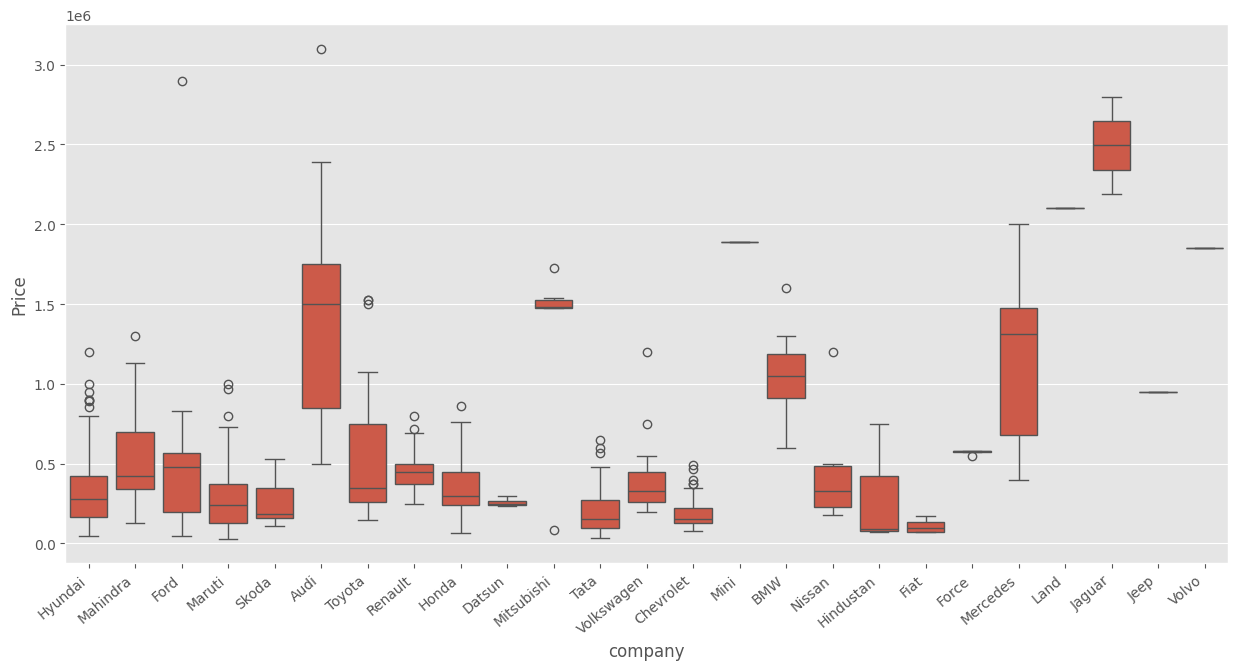

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

<ipython-input-96-b3fa27111022>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


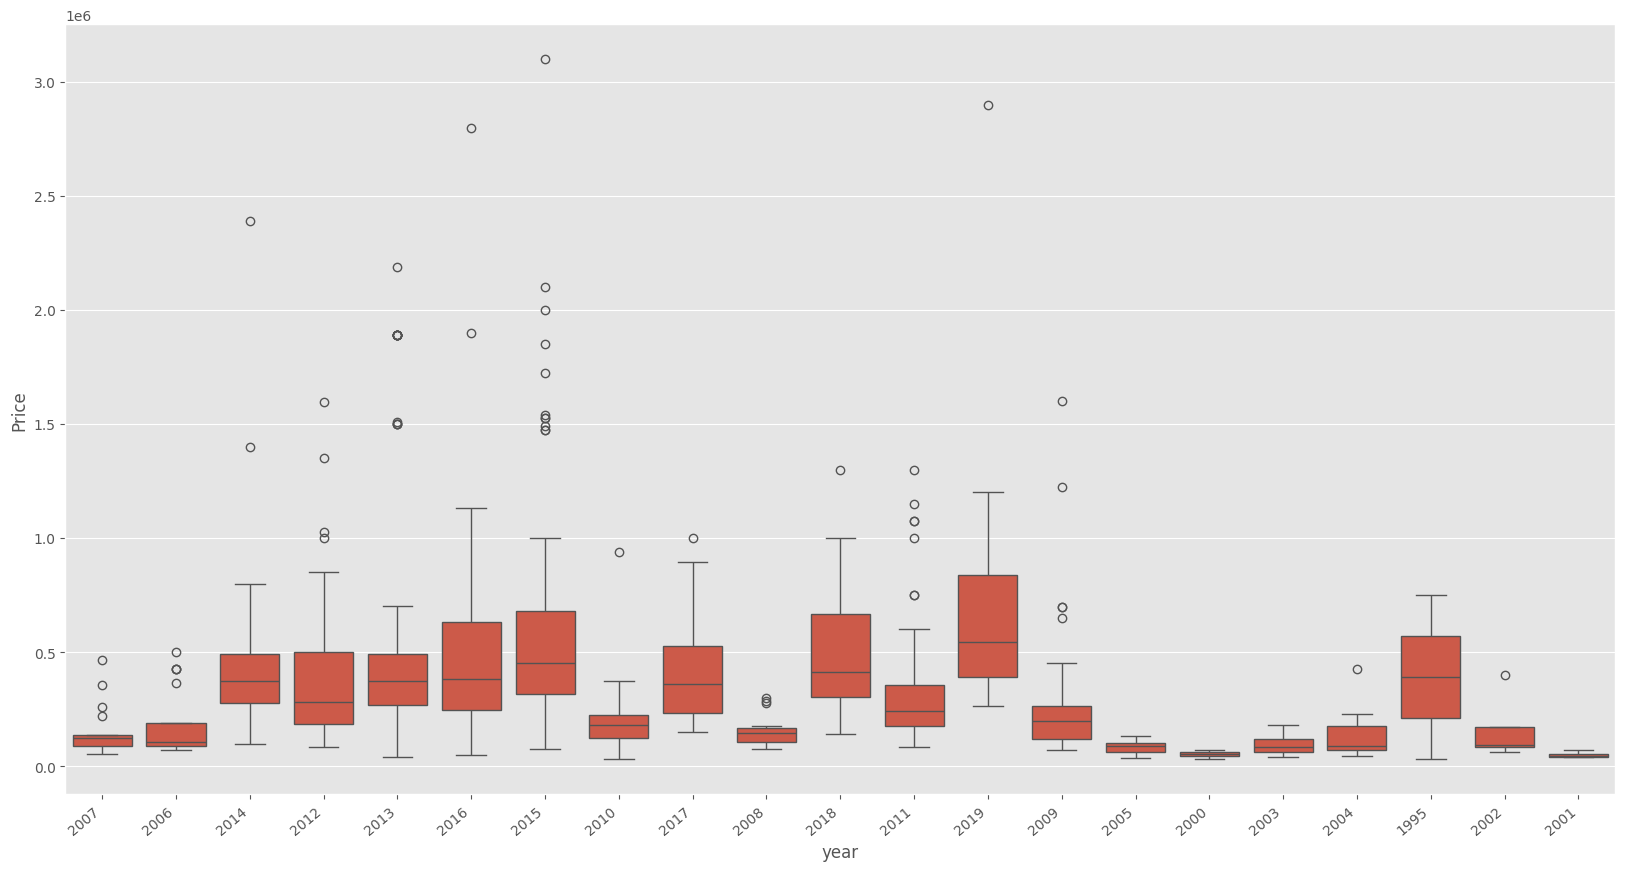

In [ ]:
plt.subplots(figsize=(20,10))  # 20 inches wide and 10 inches tall.
ax=sns.boxplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

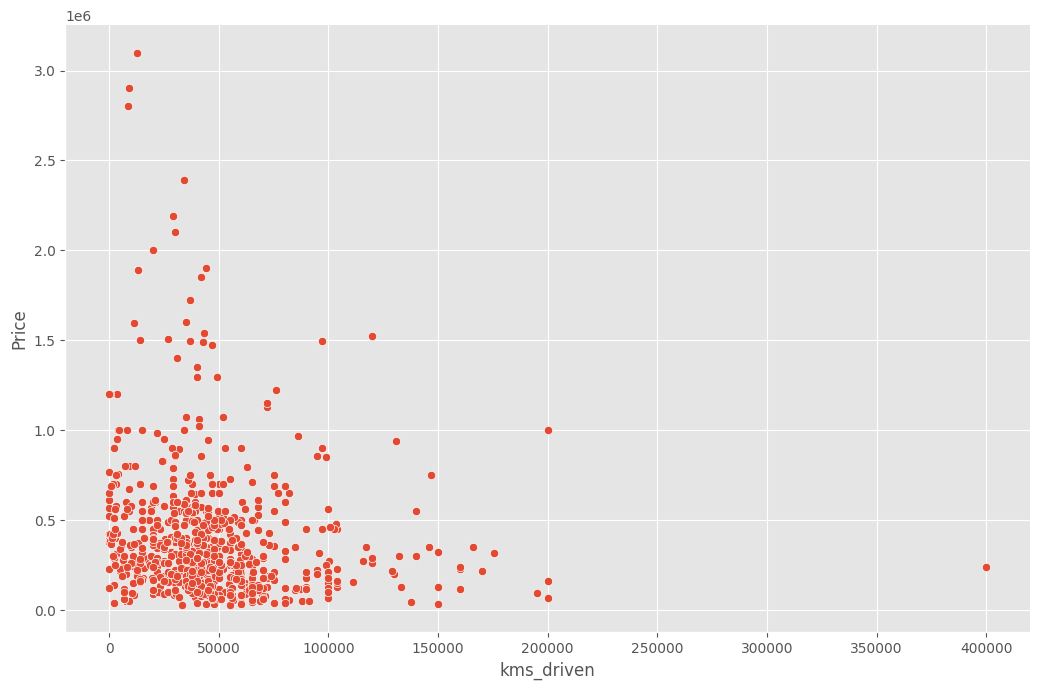

In [ ]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

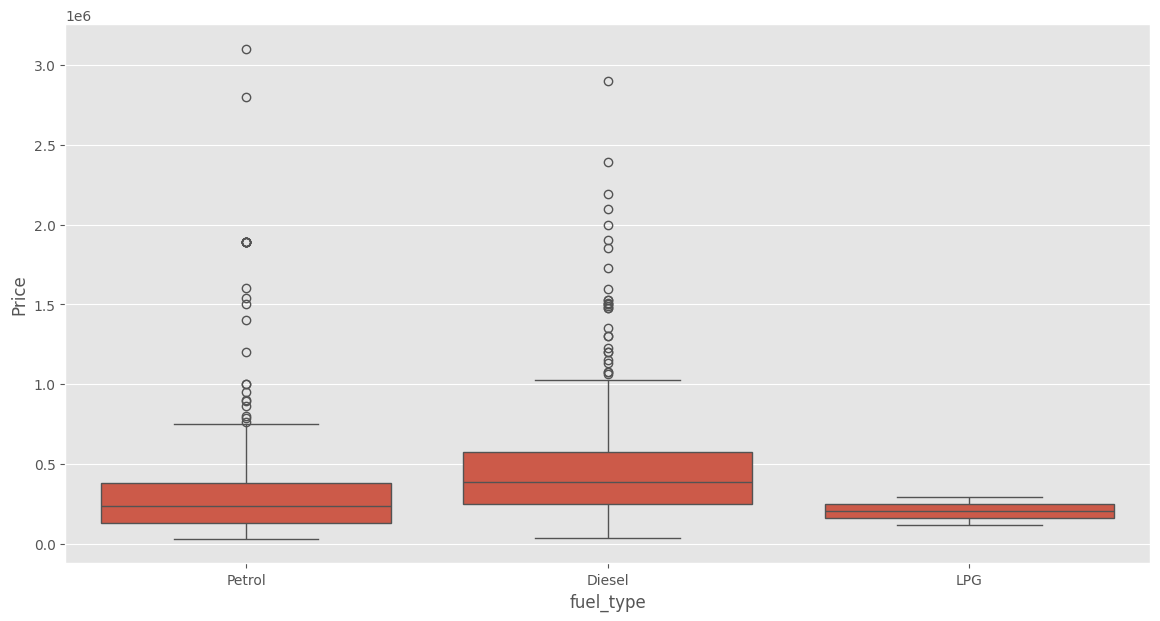

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

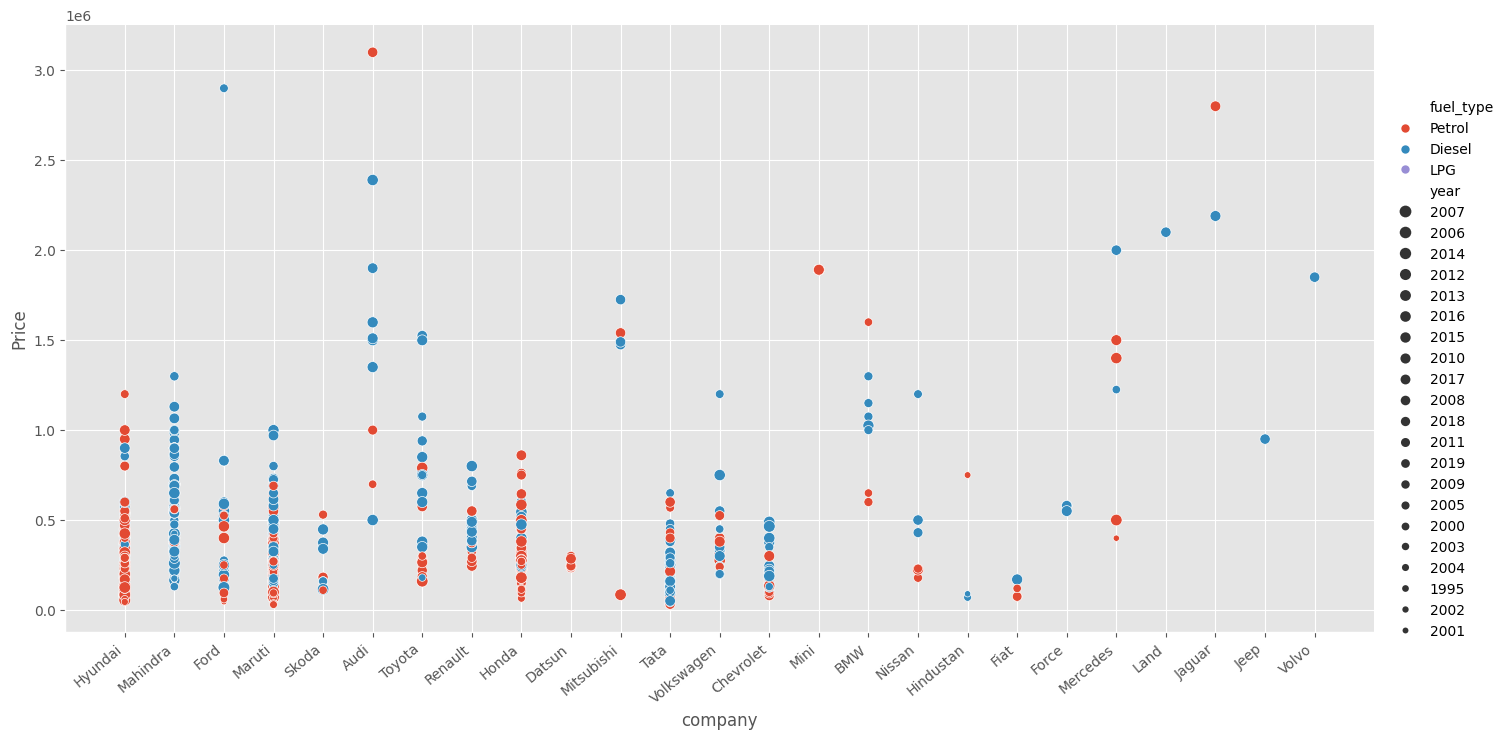

In [ ]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [ ]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']   # x:input features, y:target variable

In [ ]:
X
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int64

In [ ]:
y.shape
X.shape  #815 rows and 5 columns

(815, 5)

### Applying Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X.head()
#y.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])


OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')
print(column_trans)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petro

#### Linear Regression Model

In [ ]:
lr=LinearRegression()


#### Making a pipeline

In [ ]:
pipe=make_pipeline(column_trans,lr)
print(pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

#### Fitting the  model

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [ ]:
r2_score(y_test,y_pred)

0.8991190499074018

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

302

In [ ]:
scores[np.argmax(scores)]

0.8991190499074018

#### The best model is found at a certain random state

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991190499074018

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456549.33356479])

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese